In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop,SGD
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.utils import validation
from sklearn import preprocessing
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing import image
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras_preprocessing.image import ImageDataGenerator

In [2]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [5]:
training_set= train_datagen.flow_from_directory('D:\Học\Kỳ 2\\train',
                                               target_size=(150,150), batch_size=32,
                                               class_mode='categorical')

Found 6770 images belonging to 15 classes.


In [6]:
validation=train_datagen.flow_from_directory('D:\Học\Kỳ 2\\test',
                                           target_size=(150,150),batch_size=32, 
                                           class_mode='categorical')

Found 6354 images belonging to 15 classes.


In [7]:
training_set.class_indices

{'Anh_dao': 0,
 'Bo_de': 1,
 'Cam_xe': 2,
 'Cao_su': 3,
 'Dang_huong': 4,
 'Hoang_dan': 5,
 'Lim': 6,
 'Mo': 7,
 'Mun': 8,
 'Muong_den': 9,
 'Que': 10,
 'Sa_moc_dau': 11,
 'Thuy_tung': 12,
 'Tram_hong': 13,
 'Xa_cu': 14}

In [8]:
validation.class_indices

{'Anh_dao': 0,
 'Bo_de': 1,
 'Cam_xe': 2,
 'Cao_su': 3,
 'Dang_huong': 4,
 'Hoang_dan': 5,
 'Lim': 6,
 'Mo': 7,
 'Mun': 8,
 'Muong_den': 9,
 'Que': 10,
 'Sa_moc_dau': 11,
 'Thuy_tung': 12,
 'Tram_hong': 13,
 'Xa_cu': 14}

In [32]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
# Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Duỗi thẳng dữ liệu 
model.add(Flatten())
# Tạo lớp ẩn thứ nhất với 128 tín hiệu ra
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
# Tạo lớp ẩn thứ hai với 3 tín hiệu ra
model.add(Dense(15,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 18, 18, 128)     

In [ ]:

# todo  Biên dịch 
# todo Gán biến lại để vẽ đồ thị, với 500 lần học (epochs), mỗi lần học thì chỉ học␣128 dữ liệu (batch_size), khi sai số không thay đổi trong 20 lần học thì sẽ␣ dừng học 


In [10]:

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(training_set,
                    epochs=100,
                    batch_size=128,
                    verbose=1, 
                    validation_data=validation, 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/100
212/212 [==============================] - 172s 811ms/step - loss: 2.2521 - accuracy: 0.2752 - val_loss: 1.7186 - val_accuracy: 0.3924
Epoch 2/100
212/212 [==============================] - 167s 789ms/step - loss: 1.4615 - accuracy: 0.4849 - val_loss: 1.1678 - val_accuracy: 0.6088
Epoch 3/100
212/212 [==============================] - 168s 793ms/step - loss: 0.9061 - accuracy: 0.6929 - val_loss: 0.7989 - val_accuracy: 0.7279
Epoch 4/100
212/212 [==============================] - 177s 836ms/step - loss: 0.6460 - accuracy: 0.7716 - val_loss: 0.7249 - val_accuracy: 0.7737
Epoch 5/100
212/212 [==============================] - 169s 799ms/step - loss: 0.5174 - accuracy: 0.8168 - val_loss: 0.6446 - val_accuracy: 0.7910
Epoch 6/100
212/212 [==============================] - 177s 835ms/step - loss: 0.4579 - accuracy: 0.8408 - val_loss: 0.6106 - val_accuracy: 0.8203
Epoch 7/100
212/212 [==============================] - 175s 828ms/step - loss: 0.3879 - accuracy: 0.8626 - val_loss: 0

In [12]:
model.save("D:\Học\Kỳ 2\\train\model_89.h5")

In [13]:
model_CNN=load_model("D:\Học\Kỳ 2\\train\model_86.h5")

In [14]:
classes=['Anh_dao','Bo_de','Cam_xe','Cao_su','Dang_huong','Hoang_dan','Lim','Mo','Mun', 'Muong_den','Que','Sa_moc_dau','Thuy_tung','Tram_hong','Xa_cu']

<function matplotlib.pyplot.show(close=None, block=None)>

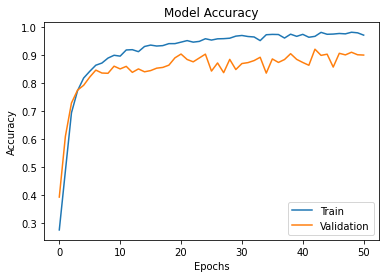

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

1/1 [==============================] - 0s 139ms/step


'Lim'

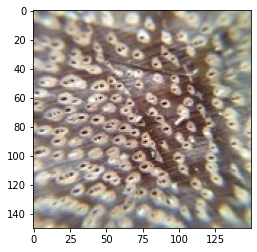

In [16]:
img = load_img('D:\Học\Kỳ 2\\test\Lim\\32723.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
a=np.argmax(model_CNN.predict(img),axis=1)
classes[int(a)]

1/1 [==============================] - 0s 31ms/step


'Que'

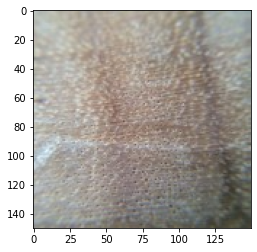

In [17]:
img = load_img('D:\Học\Kỳ 2\\test\Que\\43806.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
a=np.argmax(model_CNN.predict(img),axis=1)
classes[int(a)]

1/1 [==============================] - 0s 30ms/step


'Anh_dao'

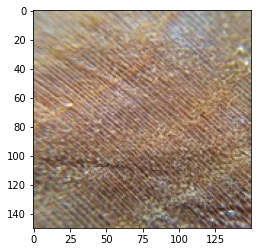

In [18]:
img = load_img('D:\Học\Kỳ 2\\test\Anh_dao\\58.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
a=np.argmax(model_CNN.predict(img),axis=1)
classes[int(a)]

1/1 [==============================] - 0s 29ms/step


'Mun'

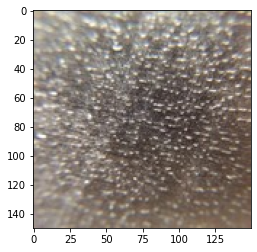

In [19]:
img = load_img('D:\Học\Kỳ 2\\test\Mun\\36927.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
a=np.argmax(model_CNN.predict(img),axis=1)
classes[int(a)]

1/1 [==============================] - 0s 32ms/step


'Cam_xe'

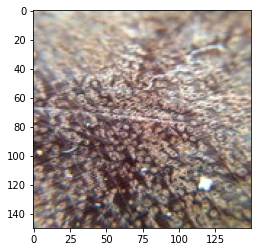

In [20]:
img = load_img('D:\Học\Kỳ 2\\test\Cam_xe\\7473.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
a=np.argmax(model_CNN.predict(img),axis=1)
classes[int(a)]

1/1 [==============================] - 0s 31ms/step


'Cao_su'

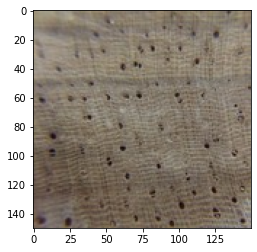

In [21]:
img = load_img('D:\Học\Kỳ 2\\test\Cao_su\\9203.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
a=np.argmax(model_CNN.predict(img),axis=1)
classes[int(a)]

1/1 [==============================] - 0s 31ms/step


'Lim'

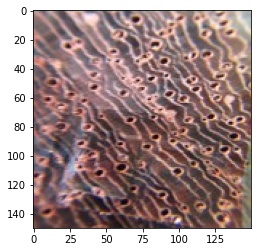

In [22]:
img = load_img('D:\Học\Kỳ 2\\test\Dang_huong\\14982.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
a=np.argmax(model_CNN.predict(img),axis=1)
classes[int(a)]

1/1 [==============================] - 0s 27ms/step


'Muong_den'

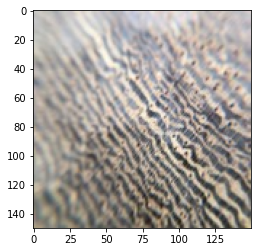

In [23]:
img = load_img('D:\Học\Kỳ 2\\test\Muong_den\\40335.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
a=np.argmax(model_CNN.predict(img),axis=1)
classes[int(a)]

1/1 [==============================] - 0s 37ms/step


'Sa_moc_dau'

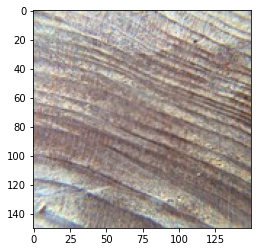

In [24]:
img = load_img('D:\Học\Kỳ 2\\test\Sa_moc_dau\\45971.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
a=np.argmax(model_CNN.predict(img),axis=1)
classes[int(a)]

1/1 [==============================] - 0s 29ms/step


'Thuy_tung'

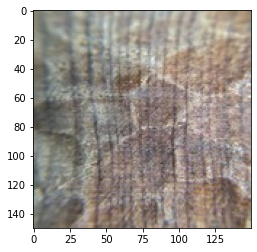

In [25]:
img = load_img('D:\Học\Kỳ 2\\test\Thuy_tung\\53469.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
a=np.argmax(model_CNN.predict(img),axis=1)
classes[int(a)]

1/1 [==============================] - 0s 25ms/step


'Que'

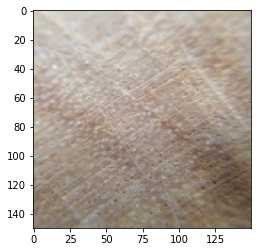

In [30]:
img = load_img('D:\Học\Kỳ 2\\test\Tram_hong\\56201.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
a=np.argmax(model_CNN.predict(img),axis=1)
classes[int(a)]